# Employee Exit Survey Analysis
## Data Cleaning and Analysis

In this project, exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia are combined, cleaned and analysed to find out the following: 

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The main columns in the DETE dataset are described as follows:
- **ID**: An ID used to identify the participant of the survey
- **SeparationType**: The reason why the person's employment ended
- **Cease Date**: The year or month the person's employment ended
- **DETE Start Date**: The year the person began employment with the DETE

The main columns in the TAFE dataset are described as follows:
- **Record ID**: An ID used to identify the participant of the survey
- **Reason for ceasing employment**: The reason why the person's employment ended
- **LengthofServiceOverall**: Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Although both organizations used the same survey template, TAFE customized some of the answers.

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# Reading in survey datasets
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

### Data Exploration

In [2]:
dete_survey.head(5)
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [3]:
dete_survey.info()
dete_survey.isnull().sum().sort_values(ascending=False)
dete_survey.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,822,822,822,817,455,822,126,817,...,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,25,51,46,15,8,9,14,5,...,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,...,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,73,98,324,161,135,54,434,...,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.info()
tafe_survey.isnull().sum().sort_values(ascending=False)
tafe_survey.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
count,7.020000e+02,702,702,695.000000,701,437,437,437,437,437,...,594,587,586,581,596,596,596,596,596,596
unique,NaN,12,2,NaN,6,2,2,2,2,2,...,2,2,2,2,2,9,5,9,7,7
top,NaN,Brisbane North Institute of TAFE,Non-Delivery (corporate),NaN,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,56 or older,Permanent Full-time,Administration (AO),Less than 1 year,Less than 1 year
freq,NaN,161,432,NaN,340,375,336,420,403,411,...,536,512,488,416,389,162,237,293,147,177
mean,6.346026e+17,NaN,NaN,2011.423022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.515071e+14,NaN,NaN,0.905977,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.341330e+17,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.343954e+17,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.345835e+17,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.348005e+17,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(dete_survey['Torres Strait'].value_counts())
print(dete_survey['South Sea'].value_counts())
print(dete_survey['Aboriginal'].value_counts())
print(dete_survey['Disability'].value_counts())

Yes    3
Name: Torres Strait, dtype: int64
Yes    7
Name: South Sea, dtype: int64
Yes    16
Name: Aboriginal, dtype: int64
Yes    23
Name: Disability, dtype: int64


#### Observations

In both dataframes, other than the ID columns, all columns are made up of bool values or object type values. 

About 4 columns in the DETE dataframe are almost nearly null (**Torres Strait, South Sea, Aboriginal, Disability**).

The non-null values in these columns all have the value 'yes' implying True for that column. They can be transformed to boolean values or removed if deemed of little essence in answering the analysis questions. These columns provide information on the nativity of the respondents and therefore may provide little insight on the reason for leaving or age demographic of the respondents. These columns can therefore be removed.

Both the dataframes contain many other columns that are not needed to complete our analysis. In addition, each dataframe contains many of the same columns, but the column names are different. There are also multiple columns/answers that all indicate an employee resigned because they were dissatisfied. The extra columns can be removed.

The DETE dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN. This can be rectified by specification in the read_csv function.



### Dropping Unwanted Columns

For the DETE survey, the objecttype columns from Professional Development (28) to Health & Safety (48) are to be dropped. These are the columns with the values such as Agree, Neutral, Strongly Agree, Disagree, Strongly Disagree and Not Applicable.

For the TAFE  survey, the same process is repeated, dropping columns containing similar "Agree/Disagree" data from Main Factor (17) to Workplace Topic (65).

In [6]:
# Reading the 'Not Stated' values in as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

# Dropping columns according to the criteria stated above
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1) 
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

print('Remaining number of columns:')
print('DETE DATAFRAME:', len(dete_survey_updated.columns))
print('TAFE DATAFRAME:', len(tafe_survey_updated.columns))

Remaining number of columns:
DETE DATAFRAME: 35
TAFE DATAFRAME: 23


### Renaming Columns
Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns to be used for the  analysis:


| dete_survey     | tafe_survey	                                                             | Definition                                              |
|:----------------|:-------------------------------------------------------------------------|:--------------------------------------------------------|
| ID              | 	Record ID                                                               | 	An id used to identify the participant of the survey   |
| SeparationType  | 	Reason for ceasing employment                                           | 	The reason why the participant's employment ended      |
| Cease Date      | 	CESSATION YEAR                                                          | The year or month the participant's employment ended    |
| DETE Start Date |                                                                          | The year the participant began employment with the DETE |
|                 | LengthofServiceOverall.Overall Length of Service at Institute (in years) | 	The length of the person's employment (in years)       |
| Age             | 	CurrentAge. Current Age                                                 | The age of the participant                              |
| Gender          | 	Gender. What is your Gender?                                            | 	The gender of the participant                          |

Because the dataframes will be combined the column names must be standardize across both dataframes. 


In [7]:
# Formatting DETE column names
dete_survey_updated.columns = dete_survey_updated.columns.str.replace('\s+', ' ').str.replace(' ','_').str.lower()

# Matching columns in the TAFE DF
tafe_cols_rename = {'Record ID':'id', 'CESSATION YEAR':'cease_date',
       'Reason for ceasing employment':'separationtype',
       'Gender. What is your Gender?':'gender', 'CurrentAge. Current Age':'age',
       'Employment Type. Employment Type':'employment_status', 'Classification. Classification':'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}

tafe_survey_updated.rename(columns=tafe_cols_rename, inplace=True)

print('DETE columns:')
print(dete_survey_updated.columns)
print('\n')
print('TAFE columns:')
print(tafe_survey_updated.columns)

DETE columns:
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


TAFE columns:
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors

/var/folders/x7/jzsq9_p147140fb1mm83f8_c0000gn/T/ipykernel_51531/326380231.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dete_survey_updated.columns = dete_survey_updated.columns.str.replace('\s+', ' ').str.replace(' ','_').str.lower()


### Data Filtering

Given that one of the end goals is to answer the question **Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?**, the seperation type column is very relevant. 

Specifically, further analysis to answer this question is narrowed down to participants who resigned.

In [8]:
print('DETE DF separation type values:')
print(dete_survey_updated['separationtype'].value_counts())
print('\n')
print('TAFE DF separation type values:')
print(tafe_survey_updated['separationtype'].value_counts())

DETE DF separation type values:
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


TAFE DF separation type values:
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


The DETE dataframe is seen to contain multiple separation types referring to those who resigned and all those entries preceed with the string 'Resignation':

- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

Each of these variations have will have to be accounted for to avoid data loss.

In [9]:
# Creating dataframe subsets for only those who resigned
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.startswith('Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.startswith('Resignation', na=False)].copy()

print('DETE DF Resignation values:')
print(dete_resignations['separationtype'].value_counts())
print('\n')
print('TAFE DF Resignation values:')
print(tafe_resignations['separationtype'].value_counts())

DETE DF Resignation values:
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64


TAFE DF Resignation values:
Resignation    340
Name: separationtype, dtype: int64


### Data Dates Verification

In this stage, double-checking is done to verify that the dates in the cease date, dete_start_date, and role_start_date columns are valid.

- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If there are many years higher than the current date or lower than 1940, the analysis cannot continue because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, they can be removed.

#### 1. Cease dates verification

In [10]:
print('DETE DF cease date values:')
print(dete_resignations['cease_date'].value_counts().sort_index())
print('\n')
print('TAFE DF cease date values:')
print(tafe_resignations['cease_date'].value_counts().sort_index())

DETE DF cease date values:
01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
Name: cease_date, dtype: int64


TAFE DF cease date values:
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


#### Observations

- The cease_dates in the DETE dataframe do not conform to a uniform pattern. The year range of 2006 to 2014 is acceptable.
This column would be cleaned to uniformly show only the year values. The datatype will also be converted to float to make it easier to work with NaN entries.

- The cease_dates in the TAFE database uniformly show year values within a sensible range from 2009 to 2013. No cleaning is required.

In [11]:
# Defining a regex to extract the year
year_pattern = r"([0-9]{4})"

# Extracting year values from the cease date column
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(year_pattern)
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

print('DETE DF cease date values:')
print(dete_resignations['cease_date'].value_counts())

DETE DF cease date values:
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


#### 2. Start dates verification

Only the DETE dataframe has start date values in the following columns: dete_start_date and role_start_date.

In [12]:
print('DETE DF start date values:')
print(dete_resignations['dete_start_date'].value_counts().sort_index())
print('\n')
print('DETE DF role start date values:')
print(dete_resignations['role_start_date'].value_counts().sort_index())

DETE DF start date values:
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64


DETE DF role start date values:
200.0      1
1976.0     2
1980.0     1
1982.0     1
1986.0     1
1987.0     2
1988.0     3
1989.0     5
1990.0     1
1991.0     1
1992.0     4
1993.0     3
1994.0     2
1996.0     3
1997.0     5
1998.0     4
1999.0     6
2000.0     1
2001.0     2
2002.0     7
2003.0     6
2004.0    10
2005.0     9
2006.0     7
2007.0    24
2008.0    21
2009.0    18
2010.0    27
2011.0

#### Observations

- The range of dete start date years lies from 1963 to 2013 which is acceptable. The values are uniform as well. 

- For the DETE role start dates, there is a highly unsual date of 200. This is probably due to a data entry error. The entry can be deleted. 

In [13]:
# Removing outlier entry in DETE role start date
dete_resignations = dete_resignations.query('role_start_date != 200')

print('DETE DF role start date values:')
print(dete_resignations['role_start_date'].value_counts().sort_index())

DETE DF role start date values:
1976.0     2
1980.0     1
1982.0     1
1986.0     1
1987.0     2
1988.0     3
1989.0     5
1990.0     1
1991.0     1
1992.0     4
1993.0     3
1994.0     2
1996.0     3
1997.0     5
1998.0     4
1999.0     6
2000.0     1
2001.0     2
2002.0     7
2003.0     6
2004.0    10
2005.0     9
2006.0     7
2007.0    24
2008.0    21
2009.0    18
2010.0    27
2011.0    33
2012.0    37
2013.0    24
Name: role_start_date, dtype: int64


### Dates Visualisation

Box plots are used next to confirm the date ranges make sense for all date values.

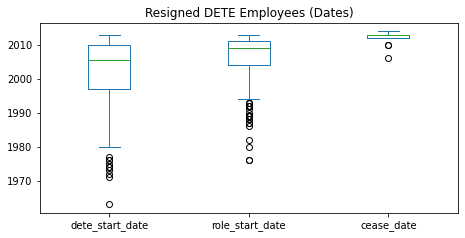

In [14]:
%matplotlib inline

plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True
dete_dates = dete_resignations[['dete_start_date', 'role_start_date', 'cease_date']]

dete_dates.plot(kind='box', title='Resigned DETE Employees (Dates)')
plt.show()

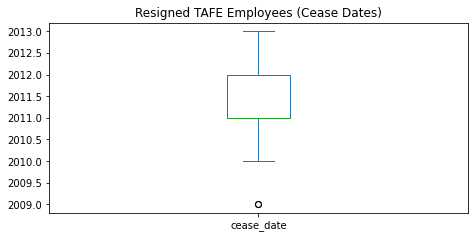

In [15]:
ax = tafe_resignations['cease_date'].plot(kind='box', title='Resigned TAFE Employees (Cease Dates)')
plt.show()

#### Observations
- For the DETE cease dates there are 2 outlier entries in 2006 and 2010. Since these are not significantly different from the minimum year of 2012, there's no reason to drop them. 

- It can be concluded that majority of the employees who resigned had joined DETE between 1997 and 2010. Most of the resigned employees did so between year 2010 and 2014.

- For the TAFE cease dates, there is an outlier entry for 2009. Again, this entry can be kept in. 

### Number of Years of Service

Given that the end goal is to find the reason for resignation in relation to the employees period of stay i.e., short or long, the years of service of each employee must be computed.

The tafe_resignations dataframe already contains an institute_service column representing the number of years of stay of the employee. In order to analyze both surveys together, a corresponding institute_service column in dete_resignations is needed. This can be obtained by subtracting the dete_start_date from the cease_date.

In [16]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [17]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     7
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

### Resignation due to dissatisfaction

Next, any employees who resigned because they were dissatisfied will be identified.

Below are the columns to be used to categorize employees as "dissatisfied" from each dataframe. If the employee indicated any of the factors above caused them to resign, they will be marked as dissatisfied in a new column.

#### tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

#### dete_survey_updated:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

To compute the **dissatisfied** column for both dataframes, each of the columns that indicate dissatisfaction will be checked and if the employee indicated that **ANY** of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. 

For values in the dissatisfied:
- True: indicates a person resigned because they were dissatisfied with the job

- False: indicates a person resigned because of a reason other than dissatisfaction with the job

- NaN: indicates the value is missing

In [18]:
dissatisfied_dete = ['job_dissatisfaction','dissatisfaction_with_the_department',
                     'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security',
                     'work_location', 'employment_conditions', 'work_life_balance', 'workload']


for column in dissatisfied_dete:
    print(dete_resignations[column].value_counts(dropna=False))
    print('\n')

False    269
True      41
Name: job_dissatisfaction, dtype: int64


False    281
True      29
Name: dissatisfaction_with_the_department, dtype: int64


False    304
True       6
Name: physical_work_environment, dtype: int64


False    277
True      33
Name: lack_of_recognition, dtype: int64


False    296
True      14
Name: lack_of_job_security, dtype: int64


False    292
True      18
Name: work_location, dtype: int64


False    287
True      23
Name: employment_conditions, dtype: int64


False    242
True      68
Name: work_life_balance, dtype: int64


False    283
True      27
Name: workload, dtype: int64




In [19]:
# TAFE columns related to dissatisfaction
dissatisfied_tafe = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

for column in dissatisfied_tafe:
    print(tafe_resignations[column].value_counts())
    print('\n')

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64




The dissatisfied_dete columns are already in the right format to compute the dissatisfied column with no NaN empty v.

The dissatisfied_tafe columns (Contributing Factors. Dissatisfaction and Contributing Factors. Job Dissatisfaction) will need to be converted to boolean True, False, or NaN values. The entries with values of "-"  are "False" to the condition, while any other string value will equate to "True".

In [20]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    if val == '-':
        return False
    else:
        return True

# updating dissatisfied_tafe values to show true or false 
for column in dissatisfied_tafe:
    tafe_resignations[column] = tafe_resignations[column].map(update_vals)

print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print('\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64


False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [21]:
#creating dissatisfied column in both databases
dete_resignations['dissatisfied'] = dete_resignations[dissatisfied_dete].any(axis=1, skipna=False).astype('bool')
tafe_resignations['dissatisfied'] = tafe_resignations[dissatisfied_tafe].any(axis=1, skipna=False).astype('bool')

print(dete_resignations['dissatisfied'].value_counts(dropna=False))
print('\n')
print(tafe_resignations['dissatisfied'].value_counts(dropna=False))

False    161
True     149
Name: dissatisfied, dtype: int64


False    241
True      99
Name: dissatisfied, dtype: int64


###  Combining Dataframes

Before that, a new column - **institute** is added to identify the origin institution of the employee in the combined data.

The values in the institute_service column for tha TAFE dataframe are grouped unlike those in the DETE dataframe. They are amde uniform by extracting the years and then regrouping in a new **service_cat** column for both dataframes according to new categories defined as follows:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

Combining the DFs as is will result in a lot of null values due to unshared columns. Therefore a threshold is set to drop columns with less than 500 non-null values. 



In [22]:
# adding an institute column
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

# identifying values in the institute colummns for both sets
print(dete_resignations['institute_service'].value_counts(dropna=False))
print('\n')
print(tafe_resignations['institute_service'].value_counts(dropna=False))

NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
8.0      8
20.0     7
13.0     7
15.0     7
17.0     6
10.0     6
22.0     6
14.0     6
12.0     6
18.0     5
16.0     5
11.0     4
23.0     4
24.0     4
21.0     3
19.0     3
39.0     3
32.0     3
30.0     2
25.0     2
28.0     2
26.0     2
36.0     2
29.0     1
27.0     1
34.0     1
42.0     1
33.0     1
41.0     1
49.0     1
35.0     1
38.0     1
31.0     1
Name: institute_service, dtype: int64


Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64


In [23]:
# extracting number of years from the string in the institue service col
pattern = r"(\d+)" # matches one or more repetitions of numbers between the range [0-9]
tafe_resignations['institute_service'] = (tafe_resignations['institute_service'].astype('str')
                                                                                .str.extract(pattern)
                                                                                .astype('float'))


In [24]:
# Function to map years to corresponding categories
def year_cat(year):
    if pd.isnull(year):
        return np.nan
    elif year < 3:
        return 'New'
    elif 3 <= year <= 6:
        return 'Experienced'
    elif 7 <= year <= 10:
        return 'Established'
    else:
        return 'Veteran'

# mapping institute service years to categories for both DFs
tafe_resignations['service_cat'] = tafe_resignations['institute_service'].apply(year_cat)
print(tafe_resignations['service_cat'].value_counts(dropna=False))

print('\n')
dete_resignations['service_cat'] = dete_resignations['institute_service'].apply(year_cat)
print(dete_resignations['service_cat'].value_counts(dropna=False))

New            137
Experienced     96
NaN             50
Veteran         36
Established     21
Name: service_cat, dtype: int64


Veteran        99
Experienced    76
New            56
Established    41
NaN            38
Name: service_cat, dtype: int64


In [25]:
# print(tafe_resignations.columns)
# print(dete_resignations.columns)

#ensuring that all relevant columns are properly named
print(np.intersect1d(dete_resignations.columns, tafe_resignations.columns))

['age' 'cease_date' 'dissatisfied' 'employment_status' 'gender' 'id'
 'institute' 'institute_service' 'position' 'separationtype' 'service_cat']


In [26]:
# combining the two dataframes
combined = pd.concat([dete_resignations, tafe_resignations]).dropna(thresh=500, axis=1)
combined.head(10)

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
3,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
5,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
8,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
9,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
11,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced
12,13.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,14.0,False,DETE,Veteran
14,15.0,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,31-35,5.0,True,DETE,Experienced
16,17.0,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE,NaN
20,21.0,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,56-60,30.0,False,DETE,Veteran
21,22.0,Resignation-Other reasons,2012.0,Cleaner,Permanent Part-time,Female,51-55,32.0,False,DETE,Veteran


The id column is irrelevant and can be deleted.

In [27]:
combined.drop('id', axis=1, inplace=True)
combined.head(10)

,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
3,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
5,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
8,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
9,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
11,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced
12,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,14.0,False,DETE,Veteran
14,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,31-35,5.0,True,DETE,Experienced
16,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE,NaN
20,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,56-60,30.0,False,DETE,Veteran
21,Resignation-Other reasons,2012.0,Cleaner,Permanent Part-time,Female,51-55,32.0,False,DETE,Veteran


### Assessing null values

In [28]:
combined.isnull().sum()

separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          0
institute             0
service_cat          88
dtype: int64

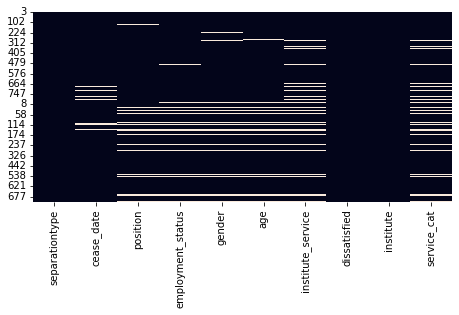

In [29]:
# visualising null values across all columns
sns.heatmap(combined.isnull(), cbar=False)
plt.show()

#### Observations

- The dissatisfied column is the most important and having any null values is unwanted therefore it will be filled with the value that appear most in the entries.

- The institute service and service cat columns are the main  indicators of how long an employee has worked at an institute. From the heatmap, it is clear that entries whose institute service records are missing also have missing data from several other columns. It is clear that they won't be useful for our analysis, so they  will drop them all from the dataframe.

In [30]:
# Finding value with higher occurence in the dissatisfied column
combined['dissatisfied'].value_counts(dropna=False)

False    402
True     248
Name: dissatisfied, dtype: int64

In [31]:
# Filling empty rows with False
combined['dissatisfied'].fillna(False)
combined['dissatisfied'].value_counts(dropna=False)

False    402
True     248
Name: dissatisfied, dtype: int64

In [32]:
#Investigating columns with missing institute service data
md = combined[(combined['institute_service'].isnull() &
          combined['age'].isnull())].shape[0]     

print('missing data across:', round(md/combined.shape[0]*100), '%')
print('missing data institute service:', round(combined[combined['institute_service'].isnull()].shape[0]/combined.shape[0]*100), '%')

missing data across: 8 %
missing data institute service: 14 %


Although the missing institute service data makes up about 14% of our data, more than half of that has a lot of other data missing as well and these gaps are relevant. The analysis is highly dependent on how long the employee stayed at the institution so the rest of the rows with missing institute service as well as missing age data data will also be dropped since age data could have given an indication of the career stage or age demographic of the employee, a lens we are looking to analyse our data with.

In [33]:
combined_updated = combined.copy()[(combined['age'].notnull() & combined['institute_service'].notnull())]

combined_updated.isnull().sum()

separationtype       0
cease_date           2
position             3
employment_status    0
gender               5
age                  0
institute_service    0
dissatisfied         0
institute            0
service_cat          0
dtype: int64

The null values are significanlty reduced. The gender and position columns could be relevant to characterising the resigned employees. Since the null values are so few, they will be filled with the most common value for that row.

In [34]:
combined_updated.head(20)
# print(combined_updated['position'].value_counts())
print(combined_updated['employment_status'].value_counts())

Permanent Full-time    243
Permanent Part-time    129
Temporary Full-time    120
Temporary Part-time     35
Contract/casual         29
Casual                   4
Name: employment_status, dtype: int64


Further cleaning:

- Age Column unionization
- position group maybe teaching and non-teaching (admin) and non-teaching (support)

In order to efficiently use the age column to carry out the analysis the values must also be cleaned and unionised accross the combine dataframe. In order to have uniform categories, these factions are defined according to standard structures used by indexmundi.com for classifying age in relation to demographics:

- 25 years or less: Early working age
- 26-55 years: Prime working age
- 56 years or older: Elderly working age

Before that, the values must be cleaned to remove the entries which have white spaces between the number ranges.

In [35]:
# replacing multiple whitespaces with dashes
combined_updated['age'] = combined_updated['age'].str.replace("  ", "-")
combined_updated['age'].value_counts()

41-45            89
46-50            72
51-55            69
36-40            68
26-30            63
31-35            61
21-25            59
56 or older      29
56-60            22
61 or older      18
20 or younger    10
Name: age, dtype: int64

In [36]:
# mapping unique column values to defined age categories
age_structure = {
    '20 or younger': 'Early working age',
    '21-25': 'Early working age',
    '26-30': 'Prime working age',
    '31-35': 'Prime working age',
    '36-40': 'Prime working age',
    '41-45': 'Prime working age',
    '46-50': 'Prime working age',
    '51-55': 'Prime working age',
    '56-60': 'Elderly working age',
    '56 or older': 'Elderly working age',
    '61 or older': 'Elderly working age'
}

combined_updated['age_structure'] = combined_updated['age'].map(age_structure)
combined_updated['age_structure'].value_counts(dropna=False)

Prime working age      422
Elderly working age     69
Early working age       69
Name: age_structure, dtype: int64

Similarly, in order to efficiently use the position column to carry out the analysis, the values need to be unionised accross the combined dataframe. In order to have uniform categories, these factions are defined according :
- teaching staff
- non-teaching staff (admin)
- non-teaching staff (support)
- non-teaching staff (other)


In [37]:
# mapping unique column values to defined position categories
position_cat = {'Administration (AO)': ' Non-teaching staff (admin)',
                'Teacher': 'Teaching staff',
                'Teacher (including LVT)': 'Teaching staff',
                'Teacher Aide': 'Teaching staff',
                'Cleaner': 'Non-teaching staff (other)',
                'Public Servant': 'Non-teaching staff (support)',
                'Professional Officer (PO)': 'Non-teaching staff (support)',
                'Operational (OO)': 'Non-teaching staff (admin)',
                'Head of Curriculum/Head of Special Education': 'Teaching staff',
                'Technical Officer': 'Non-teaching staff (support)',
                'Workplace Training Officer': 'Non-teaching staff (support)',
                'Schools Officer': 'Non-teaching staff (admin)',
                'Technical Officer (TO)': 'Non-teaching staff (support)',
                'School Administrative Staff': 'Non-teaching staff (admin)',
                'School Based Professional Staff (Therapist, nurse, etc)': 'Non-teaching staff (other)',
                'Executive (SES/SO)': 'Non-teaching staff (support)',
                'Other': 'Non-teaching staff (other)',
                'Guidance Officer': 'Non-teaching staff (support)',
                'Tutor': 'Teaching staff',
                'Professional Officer': 'Non-teaching staff (support)',
                'Business Service Manager': 'Non-teaching staff (support)'
                }

combined_updated['position_cat'] = combined_updated['position'].map(position_cat)
combined_updated['position_cat'].value_counts(dropna=False)

Teaching staff                  273
 Non-teaching staff (admin)     148
Non-teaching staff (support)     71
Non-teaching staff (other)       41
Non-teaching staff (admin)       24
NaN                               3
Name: position_cat, dtype: int64

In [38]:
# confirming that lost position_cat null values are not due to mapping errors
combined_updated[combined_updated['position_cat'].isnull()][['position', 'position_cat']]

,position,position_cat
103,NaN,NaN
116,NaN,NaN
678,NaN,NaN


## Data Analysis
**Analysis Question 1: _Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?_**

1. Service Years vs resignees
2. Dissatisafaction vs Service Years

**Analysis Question 2: _Are younger employees resigning due to some kind of dissatisfaction? What about older employees?_**

3. Dissatisfaction vs Age structure

**_Factors Contributing to Dissatisfaction_**

4. Dissatisafaction vs Institute
5. Dissatisfaction vs Gender vs Service Years
6. Dissatisfaction vs Contract type vs Service Years
7. Dissatisfaction vs Position vs Service Years


### 1. Service Years vs Resignees

This looks at the distribution of resignees according to their number of years served at the time of their resignation. This tells which service category had the most resignations.

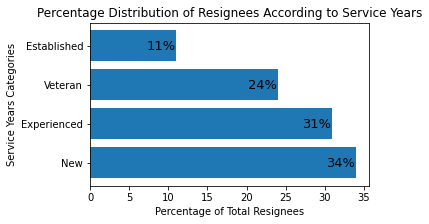

In [39]:
x_values = combined_updated['service_cat'].value_counts().index
y_values = round(100*(combined_updated['service_cat'].value_counts()/combined_updated.shape[0]))

plt.figure(figsize=(5,3))
ax = plt.barh(y=x_values, width=y_values)
plt.title('Percentage Distribution of Resignees According to Service Years')
plt.xlabel('Percentage of Total Resignees')
plt.ylabel('Service Years Categories')
plt.bar_label(container=ax, labels=None, fmt='%.0f%%', fontsize=13, label_type='edge', padding=-30)
plt.show()

Approximately 65% of the resignees are  employees who have been at their organisations less than 6 years. This is important as  high resignation rates are expected from older staff. This suggests that there could be a major driver for resignation among employees with less than 6 years at the institution.

### 2. Dissatisafaction vs Service Years
This is to narrow down the distribution to the resignees who indicated dissatisfaction to identify their distribution according to their service years.

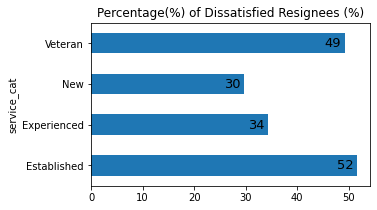

In [40]:
service_pivot = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
service_pivot['dissatisfied'] = service_pivot['dissatisfied']*100

ax = service_pivot.plot(kind='barh', figsize=(5,3), legend=False, title='Percentage(%) of Dissatisfied Resignees (%)')
for container in ax.containers:
    ax.bar_label(container, labels=None, fmt='%.0f', fontsize=13, label_type='edge', color='black', padding=-20)
plt.show()

In contrast to what was found from the service years distribution of total resignees, this figure shows that higher proportions of the veteran and established (about half each) resignees did so due to dissatisfaction. Dissatisfaction among the younger employees was expressed by ~30%  of the 'New' and ~35% of the 'Experienced' factions. This implies that a reason other than dissatisfaction might be driving the high resignation rates among the younger resignees.

**From the first two plots, analysis question as 1 follows can be answered tentatively as follows: Employees who worked for the institutes for a short period of time (less than 6 years) are not resigning due to of dissatisfaction. Only 30-35% reported that their resignation was due to dissatisfaction. However it is the reason for majority of resignations among employees who had been at the institute for longer. About of half of the experienced and established emploees resigned due to dissatisfaction.**

### Dissatisfaction vs Age Structure

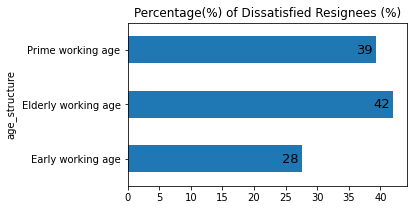

In [41]:
age_pivot = combined_updated.pivot_table(values='dissatisfied', index='age_structure')
age_pivot['dissatisfied'] = age_pivot['dissatisfied']*100

ax = age_pivot.plot(kind='barh', figsize=(5,3), legend=False, title='Percentage(%) of Dissatisfied Resignees (%)')
for container in ax.containers:
    ax.bar_label(container, labels=None, fmt='%.0f', fontsize=13, label_type='edge', color='black', padding=-20)
plt.show()

Employee dissatisfaction is observed to increase with age.

The second analysis question can be answered: **Younger employees are generally not resigning due to some kind of dissatisfaction. However, older employees are  more likely ro resign due to dissatisfaction.**

To get more substantiated findings for both analysis questions, the other relationships between dissatisfaction the other relevant properties of the resigned employees are visualised to compute which conditions might be contributing largely to employee dissatisfaction.

### 4. Dissatisfaction vs Institute


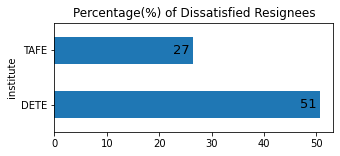

In [42]:
institute_pivot = combined_updated.pivot_table(values='dissatisfied', index='institute')
institute_pivot['dissatisfied'] = institute_pivot['dissatisfied']*100

ax = institute_pivot.plot(kind='barh', figsize=(5,2), legend=False, title='Percentage(%) of Dissatisfied Resignees')
for container in ax.containers:
    ax.bar_label(container, labels=None, fmt='%.0f', fontsize=13, label_type='edge', color='black', padding=-20)
plt.show()

### 5. Dissatisfaction vs Gender

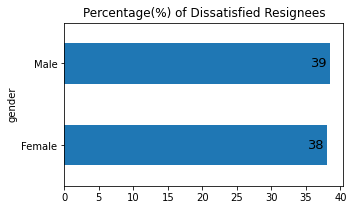

In [43]:
gender_pivot = combined_updated.pivot_table(values='dissatisfied', index='gender')
gender_pivot['dissatisfied'] = gender_pivot['dissatisfied']*100

ax = gender_pivot.plot(kind='barh', figsize=(5,3), legend=False, title='Percentage(%) of Dissatisfied Resignees')
for container in ax.containers:
    ax.bar_label(container, labels=None, fmt='%.0f', fontsize=13, label_type='edge', color='black', padding=-20)
plt.show()

Since each gender has about 40% resigning die to dissatisfaction it can be concluded that gender does not have a markable influence on dissatisfaction.

### 6. Dissatisfaction vs Contract type

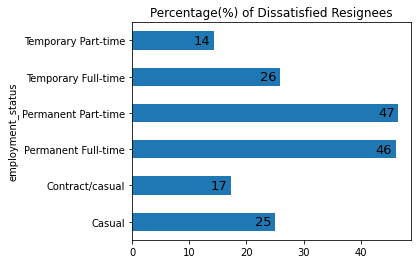

In [44]:
contract_pivot = combined_updated.pivot_table(values='dissatisfied', index='employment_status')
contract_pivot['dissatisfied'] = contract_pivot['dissatisfied']*100

ax = contract_pivot.plot(kind='barh', figsize=(5,4), legend=False, title='Percentage(%) of Dissatisfied Resignees')
for container in ax.containers:
    ax.bar_label(container, labels=None, fmt='%.0f', fontsize=13, label_type='edge', color='black', padding=-20)
plt.show()

Dissastifaction is notably higher among the permanent staff: both the full and part time former permanent workers have ~47% reporting dissatisfaction.

### 7. Dissatisfaction vs Position


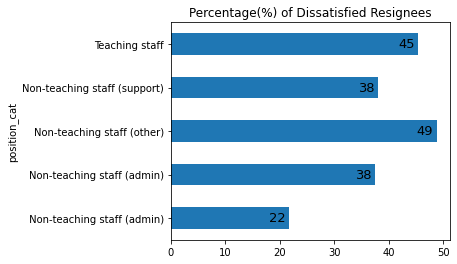

In [45]:
position_pivot = combined_updated.pivot_table(values='dissatisfied', index='position_cat')
position_pivot['dissatisfied'] = position_pivot['dissatisfied']*100

ax = position_pivot.plot(kind='barh', figsize=(5,4), legend=False, title='Percentage(%) of Dissatisfied Resignees')
for container in ax.containers:
    ax.bar_label(container, labels=None, fmt='%.0f', fontsize=13, label_type='edge', color='black', padding=-20)
plt.show()

Dissatisfaction is lowest among the administration support staff anfd highest in the teaching stuff and non-teaching stuff (other) category which is made up of janitorial staff/cleaners, school based professional staff (therapists, nurses, etc) and other minor roles. The percentages in the other categories aren't significantly lower. It is therefore not a definite relationship between the job positions and dissatisfaction.

**Conclusion (Factors Contributing to Dissatisfaction)**: From the analysis, the proportion of dissatisfed resignees from DETE were almost twice as much as those from TAFE. Based on this and given that this data set has detailed dissatisfaction classification, the analysis can carry out with the DETE data to clarify the results further. The other major factors that were found to contribute to dissatisfaction was being a permanent employee of the institution and being a teaching staff or the classification non-teaching staff(other) [please see above for definition].

## Further Analysis with DETE Exit Surveys

In [46]:
dete_resignations.head()
print(dete_resignations.shape[0])
print(dete_resignations.columns)

310
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied',
       'institute', 'service_cat'],
      dtype='object')


### Data Preparation
First only the relevant columns are kept.

In [47]:
# defining the fraction of the dete database to be used for further analysis
dete_further = dete_resignations.copy()[dete_resignations['dissatisfied']==True]

#dropping unrelevant values
dete_further = dete_further.drop(['cease_date', 'dete_start_date', 'role_start_date', 'classification','aboriginal', 'torres_strait', 'south_sea', 'disability', 'nesb'], axis=1)
dete_further.columns

Index(['id', 'separationtype', 'position', 'region', 'business_unit',
       'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'institute_service',
       'dissatisfied', 'institute', 'service_cat'],
      dtype='object')

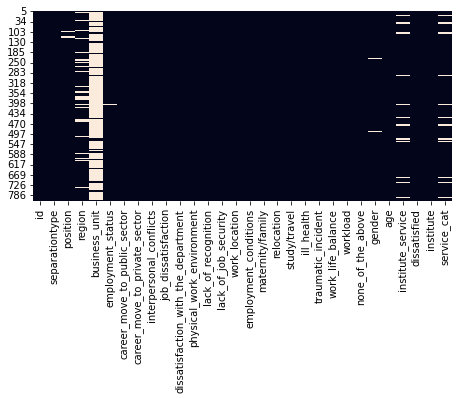

In [48]:
# visualising data to easily identify null values
sns.heatmap(dete_further.isnull(), cbar=False)
plt.show()

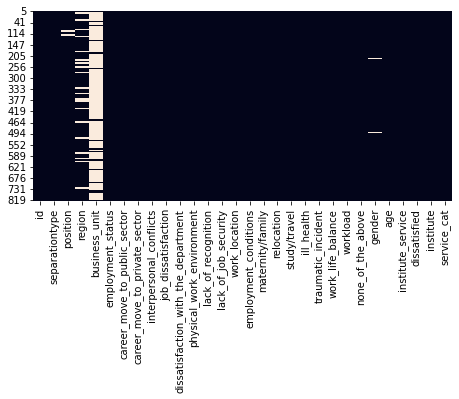

In [49]:
# dropping rows with null age and institute service values
dete_further = dete_further.copy()[(dete_further['age'].notnull() & dete_further['institute_service'].notnull())]
sns.heatmap(dete_further.isnull(), cbar=False)
plt.show()

In [50]:
# dropping the business unit and region columns since they are mainly made of null values.
dete_further = dete_further.drop(['region', 'business_unit'], axis=1)
dete_further.isnull().sum()

id                                     0
separationtype                         0
position                               2
employment_status                      0
career_move_to_public_sector           0
career_move_to_private_sector          0
interpersonal_conflicts                0
job_dissatisfaction                    0
dissatisfaction_with_the_department    0
physical_work_environment              0
lack_of_recognition                    0
lack_of_job_security                   0
work_location                          0
employment_conditions                  0
maternity/family                       0
relocation                             0
study/travel                           0
ill_health                             0
traumatic_incident                     0
work_life_balance                      0
workload                               0
none_of_the_above                      0
gender                                 2
age                                    0
institute_servic

In [51]:
# mapping raw age structures to categories defined above
dete_further['age_structure'] = dete_further['age'].map(age_structure)
dete_further['age_structure'].value_counts(dropna=False)

Prime working age      107
Elderly working age     23
Early working age        7
Name: age_structure, dtype: int64

## Data Analysis


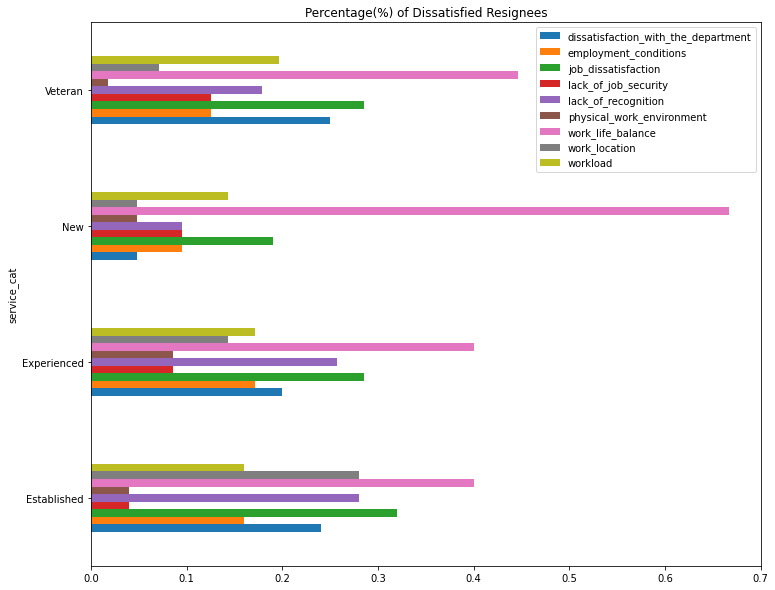

In [52]:
# creating a pivot table & plot to aggregate data by the number of years categories at DETE and compute the % of each category that resigned for each dissatisfaction reason
dete_further_pivot_serv = dete_further.pivot_table(values=dissatisfied_dete, index='service_cat')

ax = dete_further_pivot_serv.plot(kind='barh', figsize=(12,10), legend=True, title='Percentage(%) of Dissatisfied Resignees')
# for container in ax.containers:
#     ax.bar_label(container, labels=None, fmt='%.0f', fontsize=13, label_type='edge', color='black', padding=-20)
plt.show()


Accross all categories of number of service years the leading form of dissatisfaction is _worklife balance_ given that 40% or more resigned employees from each category. This is an exceptionally popular reason among New employees as 66% cited this as a reason. A general _job dissastidaction_ is the next leading reason for all service categories.

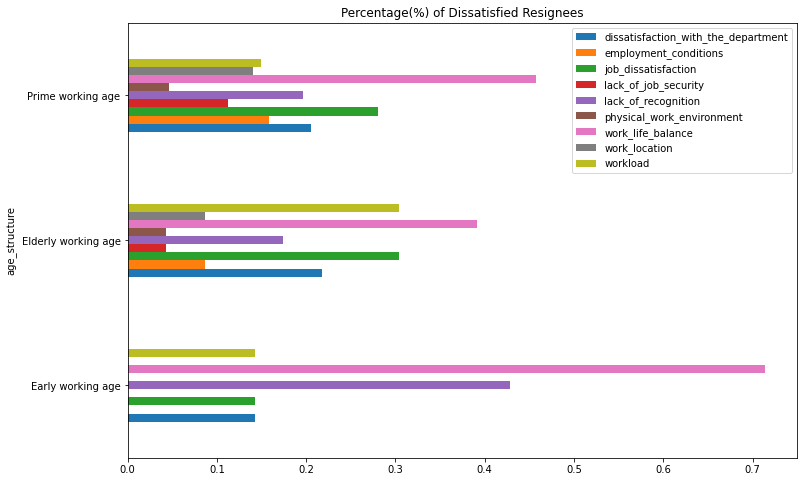

In [53]:
dete_further_pivot_age = dete_further.pivot_table(values=dissatisfied_dete, index='age_structure')

ax = dete_further_pivot_age.plot(kind='barh', figsize=(12,8), legend=True, title='Percentage(%) of Dissatisfied Resignees')
# for container in ax.containers:
#     ax.bar_label(container, labels=None, fmt='%.0f', fontsize=13, label_type='edge', color='black', padding=-20)
plt.show()

The work-life balance is cited as a dissatisfaction point for more than 70 of the early working age employees, followed by a lack of recognition. This is somewhat expected since the employees in their early working age probably make up the most of the 'New Employee' category.

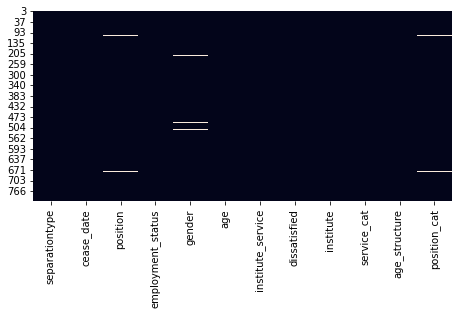

In [54]:
dete_resig_further = combined_updated.query("institute == 'DETE'")

sns.heatmap(dete_resig_further.isnull(), cbar=False)
plt.show()

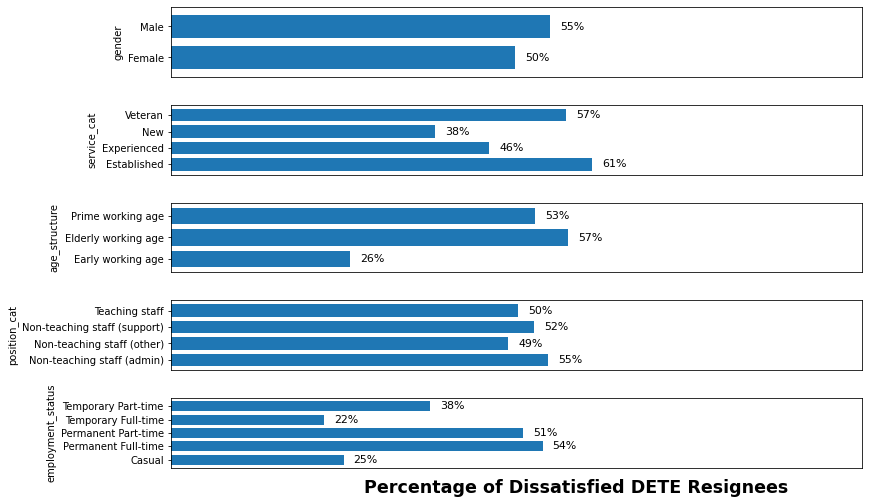

In [55]:
factor_columns = ['gender', 'service_cat', 'age_structure','position_cat', 'employment_status']


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(len(factor_columns), figsize=(10,len(factor_columns)*6))
asses = [ax1, ax2, ax3, ax4, ax5]
for ass, column in zip(asses, factor_columns):
    piv_plot = dete_resig_further.pivot_table(values='dissatisfied', index=column)
    piv_plot['dissatisfied'] = piv_plot['dissatisfied']*100
    bl = piv_plot.plot(kind='barh', figsize=(12,8), legend=False, ax=ass, width=0.75)
    for container in bl.containers:
        ass.bar_label(container, labels=None, fmt='%.0f%%', fontsize=11, label_type='edge', color='black', padding=10)
    ass.set_xlim([0,100])
    ass.set_xticks([])
    # if ass is not ax5:
    #     ass.set_xticks([])

ax5.text(28, -2.5, 'Percentage of Dissatisfied DETE Resignees', weight='bold', size=17.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

All trends are relatively approximate with what was observed with the combine data frame. The positive correlations between dissatisfaction and number of service years and dissatisfaction and age is more pronounced in the DETE survey. It will be interesting to see the corresponding trends for the TAFE survey.


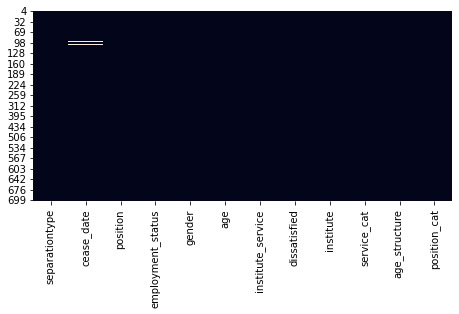

In [56]:
tafe_resig_further = combined_updated.query("institute == 'TAFE'")

sns.heatmap(tafe_resig_further.isnull(), cbar=False)
plt.show()

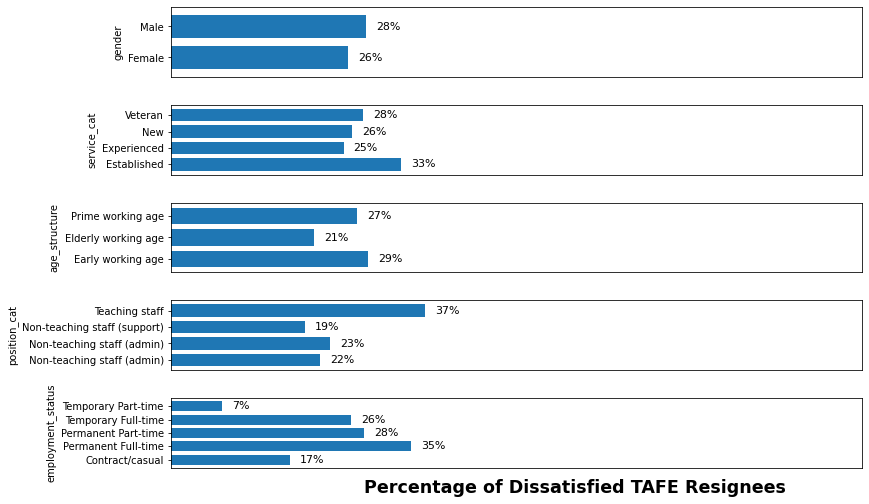

In [57]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(len(factor_columns), figsize=(10,len(factor_columns)*6))
asses = [ax1, ax2, ax3, ax4, ax5]
for ass, column in zip(asses, factor_columns):
    piv_plot = tafe_resig_further.pivot_table(values='dissatisfied', index=column)
    piv_plot['dissatisfied'] = piv_plot['dissatisfied']*100
    bl = piv_plot.plot(kind='barh', figsize=(12,8), legend=False, ax=ass, width=0.75)
    for container in bl.containers:
        ass.bar_label(container, labels=None, fmt='%.0f%%', fontsize=11, label_type='edge', color='black', padding=10)
    ass.set_xlim([0,100])
    ass.set_xticks([])

ax5.text(28, -2.5, 'Percentage of Dissatisfied TAFE Resignees', weight='bold', size=17.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

Unlike in the combined database and DETE survey, there is a negative correlation between dissatisafcation and age at TAFE; dissatisfaction is more prominent among early working age employees and least prominent in elderly working age employees.

Another contrast is observed in the plot for service category: New TAFE employees are more likely to resign due to dissatisfaction than experienced employees, however the difference is only marginal.

# Conclusion and Limitations

## Conclusion
From our analysis, we learned the relationship between various factors and resignation due to dissatisfaction. These factors included years of service, gender, age, contract type and job role. In general, we observed that 51% of DETE's resigning workforce are leaving dissatisfied while at TAFE this percentage is 27%. Established and veteran employees are more likely to leave dissatisfied. At DETE, dissatisfaction increases with increasing age while at TAFE, dissatisafaction increases with decreasing age.

Common to both institutes, gender doesn’t seem to exert much influence on employee dissatisfaction, but males were slightly more likely to be dissatisfied. More employees on permanent contracts  reported dissatisfaction compared to those with temporary or casual contracts. Teaching staff and employees who had held small helper non-teaching roles resigned more due to dissatisfaction, than non-teaching staff in admin and support roles.

The employees who had been at the institutions for less than 6 years were more likely to resign compared to their more seasoned counterparts however as mentioned, the resignations due to dissatisfaction was generally more likely for employees who had been at the institution longer. This suggests that resignations which is higher among relatively newer staff is driven by other factors such as poaching or relocation and not dissatisfaction.


## Limitations
 DETE employees were concluded to be almost twice more likely to resign due to dissatisfaction than TAFE employees, however this results may not be a clear representation of the situation as there were simply more survey responses in the DETE poll that correlated to a 'dissatisfied' conclusion. The TAFE survey received fewer responses and this disparity  limits the clarity of the results presented.